<a href="https://colab.research.google.com/github/fabianosferreira/dataset/blob/main/DataSet_Notif_Ofid.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
import pandas as pd
import glob
import os

# Montar o Google Drive
drive.mount('/content/drive')

# Caminho da pasta com os arquivos CSV no Drive
#https://drive.google.com/drive/folders/15pkBRcmth3pIK9r0HzMH0i7MXtPUYH7b?usp=sharing
pasta = '/content/drive/My Drive/Colab Notebooks/Data_CD'

# Listar arquivos CSV na pasta
arquivos_csv = glob.glob(os.path.join(pasta, "*.csv"))

if not arquivos_csv:
    print("Nenhum arquivo .csv encontrado na pasta informada.")
else:
    print(f"{len(arquivos_csv)} arquivos encontrados. Iniciando a junção...")

dataframes = []

for arquivo in arquivos_csv:
    print(f"Lendo: {os.path.basename(arquivo)}")
    try:
        df = pd.read_csv(arquivo, encoding='utf-8', sep=',')
    except UnicodeDecodeError:
        df = pd.read_csv(arquivo, encoding='latin1', sep=',')
    df['arquivo_origem'] = os.path.basename(arquivo)
    dataframes.append(df)




Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
6 arquivos encontrados. Iniciando a junção...
Lendo: ANIMBR19.csv


/tmp/ipython-input-7-2699199355.py:25: DtypeWarning: Columns (44,64,69,72,73) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(arquivo, encoding='utf-8', sep=',')


Lendo: ANIMBR20.csv


/tmp/ipython-input-7-2699199355.py:25: DtypeWarning: Columns (21,41,44,69,70,72) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(arquivo, encoding='utf-8', sep=',')


Lendo: ANIMBR21.csv


/tmp/ipython-input-7-2699199355.py:25: DtypeWarning: Columns (21,41,44,69,72) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(arquivo, encoding='utf-8', sep=',')


Lendo: ANIMBR22.csv


/tmp/ipython-input-7-2699199355.py:25: DtypeWarning: Columns (21,41,43,44,69,72) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(arquivo, encoding='utf-8', sep=',')


Lendo: ANIMBR23.csv


/tmp/ipython-input-7-2699199355.py:25: DtypeWarning: Columns (21,41,44,69,70,72) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(arquivo, encoding='utf-8', sep=',')


Lendo: ANIMBR24.csv


/tmp/ipython-input-7-2699199355.py:25: DtypeWarning: Columns (21,41,43,44,64,69,70,72) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(arquivo, encoding='utf-8', sep=',')


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
# Concatenar todos os dataframes
dados_unidos = pd.concat(dataframes, ignore_index=True)

# Salvar resultado no Drive
saida = os.path.join(pasta, "dados_ofidicos_unidos.csv")

# Verificar se o arquivo já existe
if not os.path.exists(saida):
    dados_unidos.to_csv(saida, index=False, encoding='utf-8-sig', sep=',')
    print(f"\n✅ Arquivos unidos com sucesso! Arquivo salvo em: {saida}")
else:
    print(f"\nℹ️ O arquivo '{os.path.basename(saida)}' já existe. Nenhum arquivo foi salvo.")


✅ Arquivos unidos com sucesso! Arquivo salvo em: /content/drive/My Drive/Colab Notebooks/Data_CD/dados_ofidicos_unidos.csv


In [ ]:
#Visualizando as 5 primeiras linhas dos dados
dados_unidos.head()


,TP_NOT,ID_AGRAVO,DT_NOTIFIC,SEM_NOT,NU_ANO,SG_UF_NOT,ID_MUNICIP,ID_REGIONA,DT_SIN_PRI,SEM_PRI,...,COM_RENAL,COM_EDEMA,COM_SEPTIC,COM_CHOQUE,DOENCA_TRA,EVOLUCAO,DT_OBITO,DT_ENCERRA,DT_DIGITA,arquivo_origem
0,2,X29,2019-01-01,201901,2019,29,290520,NaN,2019-01-01,201901,...,NaN,NaN,NaN,NaN,2.0,1.0,NaN,2019-01-01,NaN,ANIMBR19.csv
1,2,X29,2019-01-01,201901,2019,29,290520,NaN,2018-01-01,201801,...,NaN,NaN,NaN,NaN,2.0,1.0,NaN,2019-01-01,NaN,ANIMBR19.csv
2,2,X29,2019-01-01,201901,2019,29,290520,NaN,2019-01-01,201901,...,NaN,NaN,NaN,NaN,9.0,1.0,NaN,2019-01-01,NaN,ANIMBR19.csv
3,2,X29,2019-01-01,201901,2019,29,290520,NaN,2019-01-01,201901,...,NaN,NaN,NaN,NaN,9.0,NaN,NaN,2019-01-01,NaN,ANIMBR19.csv
4,2,X29,2019-01-01,201901,2019,29,290520,NaN,2019-01-01,201901,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-01-01,NaN,ANIMBR19.csv


In [ ]:
#Qual a quantidade de linhas e de colunas contidas no arquivo?
dados_unidos.shape

(1780616, 77)

In [ ]:

#Observando quais colunas possui DataFrame
dados_unidos.columns

Index(['TP_NOT', 'ID_AGRAVO', 'DT_NOTIFIC', 'SEM_NOT', 'NU_ANO', 'SG_UF_NOT',
       'ID_MUNICIP', 'ID_REGIONA', 'DT_SIN_PRI', 'SEM_PRI', 'ANO_NASC',
       'NU_IDADE_N', 'CS_SEXO', 'CS_GESTANT', 'CS_RACA', 'CS_ESCOL_N', 'SG_UF',
       'ID_MN_RESI', 'ID_RG_RESI', 'ID_PAIS', 'DT_INVEST', 'ID_OCUPA_N',
       'ANT_DT_ACI', 'ANT_UF', 'ANT_MUNIC_', 'ANT_LOCALI', 'ANT_TEMPO_',
       'ANT_LOCA_1', 'MCLI_LOCAL', 'CLI_DOR', 'CLI_EDEMA', 'CLI_EQUIMO',
       'CLI_NECROS', 'CLI_LOCAL_', 'CLI_LOCA_1', 'MCLI_SIST', 'CLI_NEURO',
       'CLI_HEMORR', 'CLI_VAGAIS', 'CLI_MIOLIT', 'CLI_RENAL', 'CLI_OUTR_2',
       'CLI_OUTR_3', 'CLI_TEMPO_', 'TP_ACIDENT', 'ANI_TIPO_1', 'ANI_SERPEN',
       'ANI_ARANHA', 'ANI_LAGART', 'TRA_CLASSI', 'CON_SOROTE', 'NU_AMPOLAS',
       'NU_AMPOL_1', 'NU_AMPOL_8', 'NU_AMPOL_6', 'NU_AMPOL_4', 'NU_AMPO_7',
       'NU_AMPO_5', 'NU_AMPOL_9', 'NU_AMPOL_3', 'COM_LOC', 'COM_SECUND',
       'COM_NECROS', 'COM_COMPOR', 'COM_DEFICT', 'COM_APUTAC', 'COM_SISTEM',
       'COM_RENAL', 

In [ ]:
#Deixando apenas as colunas relevantes
colunas_mantidas = ['DT_NOTIFIC', 'SEM_NOT', 'NU_ANO', 'SG_UF_NOT',
       'ID_MUNICIP', 'ID_REGIONA', 'DT_SIN_PRI', 'SEM_PRI', 'ANO_NASC',
       'NU_IDADE_N', 'CS_SEXO', 'CS_GESTANT', 'CS_RACA', 'CS_ESCOL_N', 'SG_UF',
       'ID_MN_RESI', 'ID_RG_RESI', 'ID_PAIS', 'DT_INVEST', 'ID_OCUPA_N',
       'ANT_DT_ACI', 'ANT_UF', 'ANT_MUNIC_', 'ANT_LOCALI', 'ANT_TEMPO_',
       'ANT_LOCA_1', 'MCLI_LOCAL', 'CLI_DOR', 'CLI_EDEMA', 'CLI_EQUIMO',
       'CLI_NECROS', 'CLI_LOCAL_', 'CLI_LOCA_1', 'MCLI_SIST', 'CLI_NEURO',
       'CLI_HEMORR', 'CLI_VAGAIS', 'CLI_MIOLIT', 'CLI_RENAL', 'CLI_OUTR_2',
       'CLI_OUTR_3', 'CLI_TEMPO_', 'TP_ACIDENT', 'ANI_TIPO_1', 'ANI_SERPEN',
       'ANI_ARANHA', 'ANI_LAGART', 'TRA_CLASSI', 'CON_SOROTE', 'NU_AMPOLAS',
       'NU_AMPOL_1', 'NU_AMPOL_8', 'NU_AMPOL_6', 'NU_AMPOL_4', 'NU_AMPO_7',
       'NU_AMPO_5', 'NU_AMPOL_9', 'NU_AMPOL_3', 'COM_LOC', 'COM_SECUND',
       'COM_NECROS', 'COM_COMPOR', 'COM_DEFICT', 'COM_APUTAC', 'COM_SISTEM',
       'COM_RENAL', 'COM_EDEMA', 'COM_SEPTIC', 'COM_CHOQUE', 'DOENCA_TRA',
       'EVOLUCAO', 'DT_OBITO', 'DT_ENCERRA', 'DT_DIGITA']

In [ ]:
#Salvando e sobreescrevendo as novas informações na variável dados
dados_unidos = dados_unidos[colunas_mantidas].reset_index(drop=True)

dados_unidos.head()

,DT_NOTIFIC,SEM_NOT,NU_ANO,SG_UF_NOT,ID_MUNICIP,ID_REGIONA,DT_SIN_PRI,SEM_PRI,ANO_NASC,NU_IDADE_N,...,COM_SISTEM,COM_RENAL,COM_EDEMA,COM_SEPTIC,COM_CHOQUE,DOENCA_TRA,EVOLUCAO,DT_OBITO,DT_ENCERRA,DT_DIGITA
0,2019-01-01,201901,2019,29,290520,NaN,2019-01-01,201901,2011.0,4007,...,2.0,NaN,NaN,NaN,NaN,2.0,1.0,NaN,2019-01-01,NaN
1,2019-01-01,201901,2019,29,290520,NaN,2018-01-01,201801,1942.0,4075,...,2.0,NaN,NaN,NaN,NaN,2.0,1.0,NaN,2019-01-01,NaN
2,2019-01-01,201901,2019,29,290520,NaN,2019-01-01,201901,1992.0,4026,...,9.0,NaN,NaN,NaN,NaN,9.0,1.0,NaN,2019-01-01,NaN
3,2019-01-01,201901,2019,29,290520,NaN,2019-01-01,201901,1991.0,4027,...,9.0,NaN,NaN,NaN,NaN,9.0,NaN,NaN,2019-01-01,NaN
4,2019-01-01,201901,2019,29,290520,NaN,2019-01-01,201901,1996.0,4022,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-01-01,NaN


In [ ]:
#Substituindo os números da coluna por "Sim, não e Ignorado"
dados_unidos['MCLI_LOCAL'] = dados_unidos['MCLI_LOCAL'].replace({1: 'Sim', 2: 'Não', 9: 'Ignorado'})
dados_unidos.head()

,DT_NOTIFIC,SEM_NOT,NU_ANO,SG_UF_NOT,ID_MUNICIP,ID_REGIONA,DT_SIN_PRI,SEM_PRI,ANO_NASC,NU_IDADE_N,...,COM_SISTEM,COM_RENAL,COM_EDEMA,COM_SEPTIC,COM_CHOQUE,DOENCA_TRA,EVOLUCAO,DT_OBITO,DT_ENCERRA,DT_DIGITA
0,2019-01-01,201901,2019,29,290520,NaN,2019-01-01,201901,2011.0,4007,...,2.0,NaN,NaN,NaN,NaN,2.0,1.0,NaN,2019-01-01,NaN
1,2019-01-01,201901,2019,29,290520,NaN,2018-01-01,201801,1942.0,4075,...,2.0,NaN,NaN,NaN,NaN,2.0,1.0,NaN,2019-01-01,NaN
2,2019-01-01,201901,2019,29,290520,NaN,2019-01-01,201901,1992.0,4026,...,9.0,NaN,NaN,NaN,NaN,9.0,1.0,NaN,2019-01-01,NaN
3,2019-01-01,201901,2019,29,290520,NaN,2019-01-01,201901,1991.0,4027,...,9.0,NaN,NaN,NaN,NaN,9.0,NaN,NaN,2019-01-01,NaN
4,2019-01-01,201901,2019,29,290520,NaN,2019-01-01,201901,1996.0,4022,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-01-01,NaN


In [ ]:
#Função loop para todas as colunas que possuem codificação SIM/NÃO

colunas_sim_nao = ['MCLI_LOCAL','CLI_DOR','CLI_EDEMA', 'CLI_EQUIMO',
                   'CLI_NECROS','CLI_LOCAL_','MCLI_SIST', 'CLI_NEURO',
                   'CLI_HEMORR','CLI_VAGAIS','CLI_MIOLIT','CLI_RENAL',
                   'CLI_OUTR_2', 'CON_SOROTE','COM_LOC','COM_SECUND','COM_NECROS',
                   'COM_COMPOR','COM_DEFICT','COM_APUTAC','COM_SISTEM','COM_RENAL',
                   'COM_EDEMA','COM_SEPTIC','COM_CHOQUE','DOENCA_TRA']


for coluna in colunas_sim_nao:
  dados_unidos[coluna] = dados_unidos[coluna].replace({1: 'Sim', 2: 'Não', 9: 'Ignorado'})

dados_unidos.head()

,DT_NOTIFIC,SEM_NOT,NU_ANO,SG_UF_NOT,ID_MUNICIP,ID_REGIONA,DT_SIN_PRI,SEM_PRI,ANO_NASC,NU_IDADE_N,...,COM_SISTEM,COM_RENAL,COM_EDEMA,COM_SEPTIC,COM_CHOQUE,DOENCA_TRA,EVOLUCAO,DT_OBITO,DT_ENCERRA,DT_DIGITA
0,2019-01-01,201901,2019,29,290520,NaN,2019-01-01,201901,2011.0,4007,...,Não,NaN,NaN,NaN,NaN,Não,1.0,NaN,2019-01-01,NaN
1,2019-01-01,201901,2019,29,290520,NaN,2018-01-01,201801,1942.0,4075,...,Não,NaN,NaN,NaN,NaN,Não,1.0,NaN,2019-01-01,NaN
2,2019-01-01,201901,2019,29,290520,NaN,2019-01-01,201901,1992.0,4026,...,Ignorado,NaN,NaN,NaN,NaN,Ignorado,1.0,NaN,2019-01-01,NaN
3,2019-01-01,201901,2019,29,290520,NaN,2019-01-01,201901,1991.0,4027,...,Ignorado,NaN,NaN,NaN,NaN,Ignorado,NaN,NaN,2019-01-01,NaN
4,2019-01-01,201901,2019,29,290520,NaN,2019-01-01,201901,1996.0,4022,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-01-01,NaN


In [ ]:
#Visualizando as 5 primeiras linhas dos dados_unidos
dados_unidos.head()

,DT_NOTIFIC,SEM_NOT,NU_ANO,SG_UF_NOT,ID_MUNICIP,ID_REGIONA,DT_SIN_PRI,SEM_PRI,ANO_NASC,NU_IDADE_N,...,COM_SISTEM,COM_RENAL,COM_EDEMA,COM_SEPTIC,COM_CHOQUE,DOENCA_TRA,EVOLUCAO,DT_OBITO,DT_ENCERRA,DT_DIGITA
0,2019-01-01,201901,2019,29,290520,NaN,2019-01-01,201901,2011.0,4007,...,Não,NaN,NaN,NaN,NaN,Não,1.0,NaN,2019-01-01,NaN
1,2019-01-01,201901,2019,29,290520,NaN,2018-01-01,201801,1942.0,4075,...,Não,NaN,NaN,NaN,NaN,Não,1.0,NaN,2019-01-01,NaN
2,2019-01-01,201901,2019,29,290520,NaN,2019-01-01,201901,1992.0,4026,...,Ignorado,NaN,NaN,NaN,NaN,Ignorado,1.0,NaN,2019-01-01,NaN
3,2019-01-01,201901,2019,29,290520,NaN,2019-01-01,201901,1991.0,4027,...,Ignorado,NaN,NaN,NaN,NaN,Ignorado,NaN,NaN,2019-01-01,NaN
4,2019-01-01,201901,2019,29,290520,NaN,2019-01-01,201901,1996.0,4022,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-01-01,NaN


In [ ]:
#Formatando as colunas de data
colunas_data = ['DT_NOTIFIC','DT_SIN_PRI','DT_INVEST','DT_OBITO',
                'DT_ENCERRA','DT_DIGITA','ANT_DT_ACI',]

for coluna in colunas_data:
  dados_unidos[coluna] = pd.to_datetime(dados_unidos[coluna], format = '%Y%m%d', errors='coerce')

dados_unidos.head()

,DT_NOTIFIC,SEM_NOT,NU_ANO,SG_UF_NOT,ID_MUNICIP,ID_REGIONA,DT_SIN_PRI,SEM_PRI,ANO_NASC,NU_IDADE_N,...,COM_SISTEM,COM_RENAL,COM_EDEMA,COM_SEPTIC,COM_CHOQUE,DOENCA_TRA,EVOLUCAO,DT_OBITO,DT_ENCERRA,DT_DIGITA
0,NaT,201901,2019,29,290520,NaN,NaT,201901,2011.0,4007,...,Não,NaN,NaN,NaN,NaN,Não,1.0,NaT,NaT,NaT
1,NaT,201901,2019,29,290520,NaN,NaT,201801,1942.0,4075,...,Não,NaN,NaN,NaN,NaN,Não,1.0,NaT,NaT,NaT
2,NaT,201901,2019,29,290520,NaN,NaT,201901,1992.0,4026,...,Ignorado,NaN,NaN,NaN,NaN,Ignorado,1.0,NaT,NaT,NaT
3,NaT,201901,2019,29,290520,NaN,NaT,201901,1991.0,4027,...,Ignorado,NaN,NaN,NaN,NaN,Ignorado,NaN,NaT,NaT,NaT
4,NaT,201901,2019,29,290520,NaN,NaT,201901,1996.0,4022,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaT,NaT


In [ ]:
#Tratando colunas únicas com base no http://portalsinan.saude.gov.br/images/documentos/Agravos/AAP/DIC_DADOS_Animais_Pedonhentos_v5.pdf
dados_unidos['ANT_TEMPO_'] = dados_unidos['ANT_TEMPO_'].replace({1: '0 - 1h',
                                                   2: '1 - 3h',
                                                   3: '3 - 6h',
                                                   4: '6 - 12h',
                                                   5: '12 e 24h',
                                                   6: '24 e +h',
                                                   9: 'Ignorado'})
################################################################################
dados_unidos['ANT_LOCA_1'] = dados_unidos['ANT_LOCA_1'].replace({1 : 'Cabeça',
                                                  2 : 'Braço',
                                                  3 : 'Ante-Braço',
                                                  4 : 'Mão',
                                                  5 : 'Dedo da Mão',
                                                  6 : 'Tronco',
                                                  7 : 'Coxa',
                                                  8 : 'Perna',
                                                  9 : 'Pé',
                                                  10 : 'Dedo do Pé',
                                                  99 : 'Ignorado'})
################################################################################
dados_unidos['CLI_TEMPO_'] = dados_unidos['CLI_TEMPO_'].replace({1 : 'Normal',
                                                   2 : 'Alterado',
                                                   9 : 'Não realizado'})
################################################################################
dados_unidos['TP_ACIDENT'] = dados_unidos['TP_ACIDENT'].replace({1 : 'Serpente',
2 : 'Aranha',
3 : 'Escorpião',
4 : 'Lagarta',
5 : 'Abelha',
6 : 'Outros',
9 : 'Ignorado',
'1' : 'Serpente',
'2' : 'Aranha',
'3' : 'Escorpião',
'4' : 'Lagarta',
'5' : 'Abelha',
'6' : 'Outros',
'9' : 'Ignorado'})
################################################################################
dados_unidos['ANI_SERPEN'] = dados_unidos['ANI_SERPEN'].replace({1: 'Botrópico',
                                                   2: 'Crotálico',
                                                   3: 'Elapídico',
                                                   4: 'Laquético',
                                                   5: 'Serpente não peçonhenta',
                                                   9: 'Ignorado'})
################################################################################
dados_unidos['ANI_ARANHA'] = dados_unidos['ANI_ARANHA'].replace({
    1: 'Foneutrismo',
    2: 'Loxoscelismo',
    3: 'Latrodectismo',
    4: 'Outra aranha',
    9: 'Ignorado'
})
################################################################################
dados_unidos['ANI_LAGART'] = dados_unidos['ANI_LAGART'].replace({
    1: 'Lonomia',
    2: 'Outra lagarta',
    9: 'Ignorado'
})
################################################################################
dados_unidos['TRA_CLASSI'] = dados_unidos['TRA_CLASSI'].replace({
    1: 'Leve',
    2: 'Moderado',
    3: 'Grave',
    9: 'Ignorado'

})
################################################################################
dados_unidos['EVOLUCAO'] = dados_unidos['EVOLUCAO'].replace({
    1: 'Cura',
    '1': 'Cura',
    2: 'Óbito por acidente por animais peçonhentos',
    3: 'Óbito por outras causas',
    9: 'Ignorado',
    '9': 'Ignorado'
})
################################################################################
dados_unidos['CS_GESTANT'] = dados_unidos['CS_GESTANT'].replace({
    1: '1º Trimestre',
    2: '2º Trimestre',
    3: '3º Trimestre',
    4: 'Idade Gestacional Ignorada',
    5: 'Não',
    6: 'Não se aplica',
    9: 'Ignorado'
})
################################################################################
dados_unidos['CS_RACA'] = dados_unidos['CS_RACA'].replace({
    1: 'Branca',
    2: 'Preta',
    3: 'Amarela',
    4: 'Parda',
    5: 'Indígena',
    9: 'Ignorado'
})
################################################################################
dados_unidos['CS_ESCOL_N'] = dados_unidos['CS_ESCOL_N'].replace({
    1: '1ª a 4ª Série Incompleta do EF',
    2: '4ª Série Completa do EF (Antigo 1° Grau)',
    3: '5ª à 8ª Série Incompleta do EF (Antigo ginásio ou 1° Grau)',
    4: 'Ensino Fundamental Completo (Antigo ginásio ou 1° Grau)',
    5: 'Ensino Médio Incompleto (antigo colegial ou 2° Grau)',
    6: 'Ensino médio completo (antigo colegial ou 2° Grau)',
    7: 'Educação superior incompleta',
    8: 'Educação superior completa',
    9: 'Ignorado',
    10: 'Não se aplica'
})


In [ ]:
dados_unidos.head()

,DT_NOTIFIC,SEM_NOT,NU_ANO,SG_UF_NOT,ID_MUNICIP,ID_REGIONA,DT_SIN_PRI,SEM_PRI,ANO_NASC,NU_IDADE_N,...,COM_SISTEM,COM_RENAL,COM_EDEMA,COM_SEPTIC,COM_CHOQUE,DOENCA_TRA,EVOLUCAO,DT_OBITO,DT_ENCERRA,DT_DIGITA
0,NaT,201901,2019,29,290520,NaN,NaT,201901,2011.0,4007,...,Não,NaN,NaN,NaN,NaN,Não,Cura,NaT,NaT,NaT
1,NaT,201901,2019,29,290520,NaN,NaT,201801,1942.0,4075,...,Não,NaN,NaN,NaN,NaN,Não,Cura,NaT,NaT,NaT
2,NaT,201901,2019,29,290520,NaN,NaT,201901,1992.0,4026,...,Ignorado,NaN,NaN,NaN,NaN,Ignorado,Cura,NaT,NaT,NaT
3,NaT,201901,2019,29,290520,NaN,NaT,201901,1991.0,4027,...,Ignorado,NaN,NaN,NaN,NaN,Ignorado,NaN,NaT,NaT,NaT
4,NaT,201901,2019,29,290520,NaN,NaT,201901,1996.0,4022,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaT,NaT


In [ ]:
#Tratando a coluna idade
#A coluna de IDADE é um pouco diferente. O SINAN utiliza uma decodificação neste formato: A composição da variável obedece o seguinte critério: primeiro dígito:

#Hora
#Dia
#Mês
#Ano
#Exemplos:

#* 3009 - Nove Meses
#* 4018 - Dezoito Anos
#Assim, como apenas nos interessa a idade em anos, diminuiremos todos os números por 4000. Caso o resultado for negativo, deixamos como zero.



# Cria uma nova coluna com idade em anos:
dados_unidos['NU_IDADE_N_'] = (
    pd.to_numeric(dados_unidos['NU_IDADE_N'], errors='coerce')  # garante conversão numérica
    .fillna(0)                                           # trata valores ausentes
    .astype(int)                                         # converte para inteiro
    .where(dados_unidos['NU_IDADE_N'] > 4000, 0)                # valores <= 4000 viram 0
    - 4000                                               # subtrai 4000 dos restantes
)

# Garante que não haja valores negativos após a subtração
dados_unidos['NU_IDADE_N_'] = dados_unidos['NU_IDADE_N_'].clip(lower=0)

# Visualização opcional
print(dados_unidos[['NU_IDADE_N', 'NU_IDADE_N_']].head())


   NU_IDADE_N  NU_IDADE_N_
0        4007            7
1        4075           75
2        4026           26
3        4027           27
4        4022           22


In [ ]:
print(dados_unidos['TP_ACIDENT'].unique())

['Escorpião' 'Serpente' 'Ignorado' 'Aranha' 'Abelha' 'Outros' 'Lagarta'
 nan 'FORMIGA DE FOGO' 'MARIMBONDO' 'LACRAIA' 'FORMIGA LAVA-P,NA,NA,NA,9"'
 'FORMIGAS' 'PICADA DE MARIMBONDO' 'PEIXE PE,NA,NA,NA,1"'
 'PIOLHO DE COBRA NA BOCA' 'lacraia' 'polistes spp.' 'peixe baiacu'
 'marimbondo' 'MARINBONDO' 'CARANGUEJEIRA' 'PIOLHO DE COBRA'
 'formiga n,NA,NA,NA,1"' 'LACRAIA/CENTOPEIA (SCOLOPENDRA'
 'SCOLOPENDRA SP (LACRAIA, CENTO' 'LAGOCEPHALUS SPP (BAIACU)' 'ABELHA'
 'FORMIGA' 'DIPLOPODA (PIOLHO DE COBRA)' 'DIPLOPODA(PIOLHO DE COBRA)'
 ',NA,NA,NA,1"' 'BESOURO' 'marinbondo' 'n,NA,NA,NA,1"'
 'INSETO N,NA,NA,NA,1"' 'nao soube identificar' 'picada de marimbondo'
 'Lacraia' 'PIOLHO-DE-COBRA' 'MARIMBONDOS' 'LACRAIA, CENTOPEIA' 'BAIACU'
 'MARIBONDO' 'formiga' 'PEIXE BAIACU' 'maribondo' 'MORCEGO' 'AGUA VIVA'
 ',NA,NA,NA,2"' 'FORMIGA  DE ASA' 'peixe fluvial' 'AGUA-VIVA'
 'FORMIGA N,NA,NA,NA,1"' 'PEIXE FLUVIAL N,NA,NA,NA,1"' 'ingesta de baiacu'
 'lacraia (piolho de cobra']


In [ ]:
municipios = pd.read_csv('/content/drive/My Drive/Colab Notebooks/Data_CD/data_set_complementar/municipios_brasil.csv', sep=';')
municipios.head()

,codigo_sinan,nome_municipio
0,250010,AGUA BRANCA
1,250020,AGUIAR
2,250030,ALAGOA GRANDE
3,250040,ALAGOA NOVA
4,250050,ALAGOINHA


In [ ]:
municipios = municipios[['codigo_sinan', 'nome_municipio']]
municipios = municipios.set_index('codigo_sinan')
municipios.head()

,nome_municipio
codigo_sinan,
250010,AGUA BRANCA
250020,AGUIAR
250030,ALAGOA GRANDE
250040,ALAGOA NOVA
250050,ALAGOINHA


In [ ]:
# atribuíremos a chave o código do município, e ao seu valor o nome da cidade.
dicionario_municipios = municipios.to_dict()['nome_municipio']

In [ ]:
dados_unidos.head()

,DT_NOTIFIC,SEM_NOT,NU_ANO,SG_UF_NOT,ID_MUNICIP,ID_REGIONA,DT_SIN_PRI,SEM_PRI,ANO_NASC,NU_IDADE_N,...,COM_RENAL,COM_EDEMA,COM_SEPTIC,COM_CHOQUE,DOENCA_TRA,EVOLUCAO,DT_OBITO,DT_ENCERRA,DT_DIGITA,NU_IDADE_N_
0,NaT,201901,2019,29,290520,NaN,NaT,201901,2011.0,4007,...,NaN,NaN,NaN,NaN,Não,Cura,NaT,NaT,NaT,7
1,NaT,201901,2019,29,290520,NaN,NaT,201801,1942.0,4075,...,NaN,NaN,NaN,NaN,Não,Cura,NaT,NaT,NaT,75
2,NaT,201901,2019,29,290520,NaN,NaT,201901,1992.0,4026,...,NaN,NaN,NaN,NaN,Ignorado,Cura,NaT,NaT,NaT,26
3,NaT,201901,2019,29,290520,NaN,NaT,201901,1991.0,4027,...,NaN,NaN,NaN,NaN,Ignorado,NaN,NaT,NaT,NaT,27
4,NaT,201901,2019,29,290520,NaN,NaT,201901,1996.0,4022,...,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaT,NaT,22


In [ ]:
dados_unidos['ID_MUNICIP_nome'] = dados_unidos['ID_MUNICIP'].map(dicionario_municipios)

dados_unidos['ID_MN_RESI_nome']= dados_unidos['ID_MN_RESI'].map(dicionario_municipios)

dados_unidos['ANT_MUNIC_nome'] = dados_unidos['ANT_MUNIC_'].map(dicionario_municipios)

dados_unidos.head()



,DT_NOTIFIC,SEM_NOT,NU_ANO,SG_UF_NOT,ID_MUNICIP,ID_REGIONA,DT_SIN_PRI,SEM_PRI,ANO_NASC,NU_IDADE_N,...,COM_CHOQUE,DOENCA_TRA,EVOLUCAO,DT_OBITO,DT_ENCERRA,DT_DIGITA,NU_IDADE_N_,ID_MUNICIP_nome,ID_MN_RESI_nome,ANT_MUNIC_nome
0,NaT,201901,2019,29,290520,NaN,NaT,201901,2011.0,4007,...,NaN,Não,Cura,NaT,NaT,NaT,7,NaN,NaN,NaN
1,NaT,201901,2019,29,290520,NaN,NaT,201801,1942.0,4075,...,NaN,Não,Cura,NaT,NaT,NaT,75,NaN,NaN,NaN
2,NaT,201901,2019,29,290520,NaN,NaT,201901,1992.0,4026,...,NaN,Ignorado,Cura,NaT,NaT,NaT,26,NaN,NaN,NaN
3,NaT,201901,2019,29,290520,NaN,NaT,201901,1991.0,4027,...,NaN,Ignorado,NaN,NaT,NaT,NaT,27,NaN,NaN,NaN
4,NaT,201901,2019,29,290520,NaN,NaT,201901,1996.0,4022,...,NaN,NaN,NaN,NaT,NaT,NaT,22,NaN,NaN,NaN


In [ ]:
#Tratando a coluna UF
dados_unidos['ANT_UF']

,ANT_UF
0,29.0
1,29.0
2,29.0
3,29.0
4,29.0
...,...
1780611,32.0
1780612,32.0
1780613,32.0
1780614,32.0


In [ ]:
estados_uf = pd.read_csv(
    '/content/drive/My Drive/Colab Notebooks/Data_CD/data_set_complementar/cod_uf.csv')
estados_uf = estados_uf.set_index('Código UF')
estados_uf.head()

,Unidade da Federação,UF,Populacao
Código UF,,,
11,Rondônia,RO,1805788
12,Acre,AC,829619
13,Amazonas,AM,4063614
14,Roraima,RR,522636
15,Pará,PA,8366628


In [ ]:
dicionario_estados_uf = estados_uf.to_dict()['UF']
dicionario_estados_uf

{11: 'RO',
 12: 'AC',
 13: 'AM',
 14: 'RR',
 15: 'PA',
 16: 'AP',
 17: 'TO',
 21: 'MA',
 22: 'PI',
 23: 'CE',
 24: 'RN',
 25: 'PB',
 26: 'PE',
 27: 'AL',
 28: 'SE',
 29: 'BA',
 31: 'MG',
 32: 'ES',
 33: 'RJ',
 35: 'SP',
 41: 'PR',
 42: 'SC',
 43: 'RS',
 50: 'MS',
 51: 'MT',
 52: 'GO',
 53: 'DF'}

In [ ]:

dados_unidos['SG_UF_nome'] = dados_unidos['SG_UF'].map(dicionario_estados_uf)
dados_unidos['SG_UF_NOT_nome'] = dados_unidos['SG_UF_NOT'].map(dicionario_estados_uf)
dados_unidos['ANT_UF_nome'] = dados_unidos['ANT_UF'].map(dicionario_estados_uf)
dados_unidos.head()

,DT_NOTIFIC,SEM_NOT,NU_ANO,SG_UF_NOT,ID_MUNICIP,ID_REGIONA,DT_SIN_PRI,SEM_PRI,ANO_NASC,NU_IDADE_N,...,DT_OBITO,DT_ENCERRA,DT_DIGITA,NU_IDADE_N_,ID_MUNICIP_nome,ID_MN_RESI_nome,ANT_MUNIC_nome,SG_UF_nome,SG_UF_NOT_nome,ANT_UF_nome
0,NaT,201901,2019,29,290520,NaN,NaT,201901,2011.0,4007,...,NaT,NaT,NaT,7,NaN,NaN,NaN,BA,BA,BA
1,NaT,201901,2019,29,290520,NaN,NaT,201801,1942.0,4075,...,NaT,NaT,NaT,75,NaN,NaN,NaN,BA,BA,BA
2,NaT,201901,2019,29,290520,NaN,NaT,201901,1992.0,4026,...,NaT,NaT,NaT,26,NaN,NaN,NaN,BA,BA,BA
3,NaT,201901,2019,29,290520,NaN,NaT,201901,1991.0,4027,...,NaT,NaT,NaT,27,NaN,NaN,NaN,BA,BA,BA
4,NaT,201901,2019,29,290520,NaN,NaT,201901,1996.0,4022,...,NaT,NaT,NaT,22,NaN,NaN,NaN,BA,BA,BA


In [ ]:
#Renomeando colunas
dicionario_colunas = {'DT_NOTIFIC':'Data da notificação',
                     'SEM_NOT':'Semana da notificação',
                     'NU_ANO':'Ano da notificação',
                     'SG_UF_NOT':'UF de notificação',
                     'ID_MUNICIP':'Código Município de notificação',
                     'ID_REGIONA':'Regional de Notificação',
                     'DT_SIN_PRI':'Data de início dos sintomas',
                     'SEM_PRI':'Semana de início dos sintomas',
                     'ANO_NASC':'Data de Nascimento',
                     'NU_IDADE_N':'Idade',
                      'CS_SEXO':'Sexo',
                      'CS_GESTANT':"Gestante",
                      'CS_RACA':'Raça',
                      'CS_ESCOL_N':'Escolaridade',
                      'SG_UF':'UF de Residência',
                      'ID_MN_RESI':'Código Município de Residência',
                      'ID_RG_RESI':'Regional de Residência',
                      'ID_PAIS':'País de Residência',
                      'DT_INVEST':'Data da investigação',
                      'ID_OCUPA_N':'Ocupação',
                      'ANT_DT_ACI':'Data do acidente',
                      'ANT_UF':'UF do acidente',
                      'ANT_MUNIC_':'Código Município de ocorrência do acidente',
                      'ANT_LOCALI':'Localidade da ocorrência',
                      'ANT_ZONA':'Zona de ocorrência',
                      'ANT_TEMPO_':'Tempo decorrido picada/atendimento',
                      'ANT_LOCA_1':'Local da picada',
                      'MCLI_LOCAL':'Manifestações locais',
                      'CLI_DOR':'Manifestações locais - Dor',
                      'CLI_EDEMA':'Manifestações locais - Edema',
                      'CLI_EQUIMO':'Manifestações locais - Esquimose',
                      'CLI_NECROS':'Manifestações locais - Necrose',
                      'CLI_LOCAL_':'Manifestações locais - Outras',
                      'CLI_LOCA_1':'Manifestações locais - Outras - especificada',
                      'MCLI_SIST':'Manifestações sistêmicas',
                      'CLI_NEURO':'Manifestações sistêmicas - Neuroparalíticas (ptose, palpebral, turvação visual',
                      'CLI_HEMORR':'Manifestações sistêmicas - Hemorrágicas (gengivorragia, outros sangramentos)',
                      'CLI_VAGAIS':'Manifestações sistêmicas - Vagais (vômitos/ diarreias)',
                      'CLI_MIOLIT':'Manifestações sistêmicas - Miolíficas/hemolíticas (mialgia, anemia, urina escura)',
                      'CLI_RENAL':'Manifestações sistêmicas - Renais (oligúria/anúria)',
                      'CLI_OUTR_2':'Manifestações sistêmicas - Outras',
                      'CLI_OUTR_3':'Manifestações sistêmicas - Outras especificada',
                      'CLI_TEMPO_':'Tempo de coagulação',
                      'TP_ACIDENT':'Tipo de acidente',
                      'ANI_TIPO_1':'Tipo de acidente - outros',
                      'ANI_SERPEN':'Serpente - tipo de acidente',
                      'ANI_ARANHA':'Aranha - tipo de acidente',
                      'ANI_LAGART':'Lagarta - tipo de acidente',
                      'TRA_CLASSI':'Classificação do caso',
                      'CON_SOROTE':'Soroterapia',
                      'NU_AMPOLAS':'Soroterapia - Número de ampolas de soro antibrotópico (SAB)',
                      'NU_AMPOL_1':'Soroterapia - Número de ampolas de soro antivrotálico (SAC)',
                      'NU_AMPOL_8':'Soroterapia - Número de ampolas de soro antiaracnídico (SAAr)',
                      'NU_AMPOL_6':'Soroterapia - Número de ampolas de soro antibrotópico-laquético (SABL)',
                      'NU_AMPOL_4':'Soroterapia - Número de ampolas de soro antielapídico (SAEL)',
                      'NU_AMPO_7':'Soroterapia - Número de ampolas de soro antiloxoscélico (SALox)',
                      'NU_AMPO_5':'Soroterapia - Número de ampolas de soro antibrotópico-crotálico (SABC)',
                      'NU_AMPOL_9':'Soroterapia - Número de ampolas de soro antiescorpiônico (SAEsc)',
                      'NU_AMPOL_3':'Soroterapia - Número de ampolas de soro antilonômico (SALon)',
                      'COM_LOC':'Complicações locais',
                      'COM_SECUND':'Complicações locais - Infecção secundária',
                      'COM_NECROS':'Complicações locais - Necrose extensa',
                      'COM_COMPOR':'Complicações locais - Síndrome comportamental',
                      'COM_DEFICT':'Complicações locais - Déficit Funcional ',
                      'COM_APUTAC':'Complicações locais - Amputação ',
                      'COM_SISTEM':'Complicações sistêmicas',
                      'COM_RENAL':'Complicações sistêmicas - Insuficiência renal ',
                      'COM_EDEMA':'Complicações sistêmicas - Insuficiência Respiratória/Edema Pulmonar Agudo ',
                      'COM_SEPTIC':'Complicações sistêmicas - Septicemia ',
                      'COM_CHOQUE':'Complicações sistêmicas - Choque ',
                      'DOENCA_TRA':'Acidente relacionado ao trabalho',
                      'EVOLUCAO':'Evolução do caso',
                      'DT_OBITO':'Data do óbito',
                      'DT_ENCERRA':'Data do encerramento',
                      'DT_DIGITA':'Data de digitação',
                      'NU_IDADE_N_': 'Idade1',
                      'ID_MUNICIP_nome':'Município de notificação1',
                      'ID_MN_RESI_nome':'Município de Residência2',
                      'ANT_MUNIC_nome':'Município de ocorrência do acidente3',
                      'ID_OCUPA_N_nome': 'Ocupação4',
                      'SG_UF_nome': 'UF de Residência5',
                      'SG_UF_NOT_nome': 'UF de notificação6',
                      'ANT_UF_nome': 'UF do acidente7'}

In [ ]:
dados_final = dados_unidos.rename(columns=dicionario_colunas)
dados_final

,Data da notificação,Semana da notificação,Ano da notificação,UF de notificação,Código Município de notificação,Regional de Notificação,Data de início dos sintomas,Semana de início dos sintomas,Data de Nascimento,Idade,...,Data do óbito,Data do encerramento,Data de digitação,Idade1,Município de notificação1,Município de Residência2,Município de ocorrência do acidente3,UF de Residência5,UF de notificação6,UF do acidente7
0,NaT,201901,2019,29,290520,NaN,NaT,201901,2011.0,4007,...,NaT,NaT,NaT,7,NaN,NaN,NaN,BA,BA,BA
1,NaT,201901,2019,29,290520,NaN,NaT,201801,1942.0,4075,...,NaT,NaT,NaT,75,NaN,NaN,NaN,BA,BA,BA
2,NaT,201901,2019,29,290520,NaN,NaT,201901,1992.0,4026,...,NaT,NaT,NaT,26,NaN,NaN,NaN,BA,BA,BA
3,NaT,201901,2019,29,290520,NaN,NaT,201901,1991.0,4027,...,NaT,NaT,NaT,27,NaN,NaN,NaN,BA,BA,BA
4,NaT,201901,2019,29,290520,NaN,NaT,201901,1996.0,4022,...,NaT,NaT,NaT,22,NaN,NaN,NaN,BA,BA,BA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1780611,NaT,202501,2024,32,320400,NaN,NaT,202501,1972.0,4052,...,NaT,NaT,NaT,52,NaN,NaN,NaN,ES,ES,ES
1780612,NaT,202452,2024,32,320080,NaN,NaT,202452,1998.0,4026,...,NaT,NaT,NaT,26,NaN,NaN,NaN,ES,ES,ES
1780613,NaT,202452,2024,32,320080,NaN,NaT,202452,1972.0,4052,...,NaT,NaT,NaT,52,NaN,NaN,NaN,ES,ES,ES
1780614,NaT,202452,2024,32,320517,NaN,NaT,202452,2010.0,4014,...,NaT,NaT,NaT,14,NaN,NaN,NaN,ES,ES,ES


In [ ]:
#Visualizando colunas vazias e removendo-as

total = len(dados_final)
nulos = dados_final['Regional de Residência'].isnull().sum()
percentual = (nulos / total) * 100

print(f'{nulos} registros nulos ({percentual:.2f}% da coluna)')

1780616 registros nulos (100.00% da coluna)


In [ ]:

total = len(dados_final)
nulos = dados_final['Localidade da ocorrência'].isnull().sum()
percentual = (nulos / total) * 100
print(f'{nulos} registros nulos ({percentual:.2f}% da coluna)')

1780616 registros nulos (100.00% da coluna)


In [ ]:
colunas_vazias = ['Regional de Residência', 'Localidade da ocorrência']

In [ ]:
dados_final = dados_final.drop(colunas_vazias, axis=1)
dados_final

,Data da notificação,Semana da notificação,Ano da notificação,UF de notificação,Código Município de notificação,Regional de Notificação,Data de início dos sintomas,Semana de início dos sintomas,Data de Nascimento,Idade,...,Data do óbito,Data do encerramento,Data de digitação,Idade1,Município de notificação1,Município de Residência2,Município de ocorrência do acidente3,UF de Residência5,UF de notificação6,UF do acidente7
0,NaT,201901,2019,29,290520,NaN,NaT,201901,2011.0,4007,...,NaT,NaT,NaT,7,NaN,NaN,NaN,BA,BA,BA
1,NaT,201901,2019,29,290520,NaN,NaT,201801,1942.0,4075,...,NaT,NaT,NaT,75,NaN,NaN,NaN,BA,BA,BA
2,NaT,201901,2019,29,290520,NaN,NaT,201901,1992.0,4026,...,NaT,NaT,NaT,26,NaN,NaN,NaN,BA,BA,BA
3,NaT,201901,2019,29,290520,NaN,NaT,201901,1991.0,4027,...,NaT,NaT,NaT,27,NaN,NaN,NaN,BA,BA,BA
4,NaT,201901,2019,29,290520,NaN,NaT,201901,1996.0,4022,...,NaT,NaT,NaT,22,NaN,NaN,NaN,BA,BA,BA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1780611,NaT,202501,2024,32,320400,NaN,NaT,202501,1972.0,4052,...,NaT,NaT,NaT,52,NaN,NaN,NaN,ES,ES,ES
1780612,NaT,202452,2024,32,320080,NaN,NaT,202452,1998.0,4026,...,NaT,NaT,NaT,26,NaN,NaN,NaN,ES,ES,ES
1780613,NaT,202452,2024,32,320080,NaN,NaT,202452,1972.0,4052,...,NaT,NaT,NaT,52,NaN,NaN,NaN,ES,ES,ES
1780614,NaT,202452,2024,32,320517,NaN,NaT,202452,2010.0,4014,...,NaT,NaT,NaT,14,NaN,NaN,NaN,ES,ES,ES


In [ ]:
#Removendo colunas antigas que foram tratadas

colunas_antigas = ['Idade','Código Município de notificação','Código Município de Residência','Código Município de ocorrência do acidente','Ocupação','UF de Residência','UF de notificação','UF do acidente']

dados_final = dados_final.drop(colunas_antigas, axis = 1)

dados_final

,Data da notificação,Semana da notificação,Ano da notificação,Regional de Notificação,Data de início dos sintomas,Semana de início dos sintomas,Data de Nascimento,Sexo,Gestante,Raça,...,Data do óbito,Data do encerramento,Data de digitação,Idade1,Município de notificação1,Município de Residência2,Município de ocorrência do acidente3,UF de Residência5,UF de notificação6,UF do acidente7
0,NaT,201901,2019,NaN,NaT,201901,2011.0,M,Não se aplica,Parda,...,NaT,NaT,NaT,7,NaN,NaN,NaN,BA,BA,BA
1,NaT,201901,2019,NaN,NaT,201801,1942.0,M,Não se aplica,Parda,...,NaT,NaT,NaT,75,NaN,NaN,NaN,BA,BA,BA
2,NaT,201901,2019,NaN,NaT,201901,1992.0,M,Não se aplica,Ignorado,...,NaT,NaT,NaT,26,NaN,NaN,NaN,BA,BA,BA
3,NaT,201901,2019,NaN,NaT,201901,1991.0,F,Ignorado,Ignorado,...,NaT,NaT,NaT,27,NaN,NaN,NaN,BA,BA,BA
4,NaT,201901,2019,NaN,NaT,201901,1996.0,F,Ignorado,Ignorado,...,NaT,NaT,NaT,22,NaN,NaN,NaN,BA,BA,BA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1780611,NaT,202501,2024,NaN,NaT,202501,1972.0,M,Não se aplica,Parda,...,NaT,NaT,NaT,52,NaN,NaN,NaN,ES,ES,ES
1780612,NaT,202452,2024,NaN,NaT,202452,1998.0,M,Não se aplica,Amarela,...,NaT,NaT,NaT,26,NaN,NaN,NaN,ES,ES,ES
1780613,NaT,202452,2024,NaN,NaT,202452,1972.0,M,Não se aplica,Branca,...,NaT,NaT,NaT,52,NaN,NaN,NaN,ES,ES,ES
1780614,NaT,202452,2024,NaN,NaT,202452,2010.0,M,Não se aplica,Parda,...,NaT,NaT,NaT,14,NaN,NaN,NaN,ES,ES,ES


In [ ]:
dicionario_colunas_mantidas = {'DT_NOTIFIC':'Data da notificação',
                     'SEM_NOT':'Semana da notificação',
                     'NU_ANO':'Ano da notificação',
                     'ID_REGIONA':'Regional de Notificação',
                     'DT_SIN_PRI':'Data de início dos sintomas',
                     'SEM_PRI':'Semana de início dos sintomas',
                     'ANO_NASC':'Data de Nascimento',
                      'CS_SEXO':'Sexo',
                      'CS_GESTANT':"Gestante",
                      'CS_RACA':'Raça',
                      'CS_ESCOL_N':'Escolaridade',
                      'ID_RG_RESI':'Regional de Residência',
                      'ID_PAIS':'País de Residência',
                      'DT_INVEST':'Data da investigação',
                      'ANT_DT_ACI':'Data do acidente',
                      'ANT_LOCALI':'Localidade da ocorrência',
                      'ANT_ZONA':'Zona de ocorrência',
                      'ANT_TEMPO_':'Tempo decorrido picada/atendimento',
                      'ANT_LOCA_1':'Local da picada',
                      'MCLI_LOCAL':'Manifestações locais',
                      'CLI_DOR':'Manifestações locais - Dor',
                      'CLI_EDEMA':'Manifestações locais - Edema',
                      'CLI_EQUIMO':'Manifestações locais - Esquimose',
                      'CLI_NECROS':'Manifestações locais - Necrose',
                      'CLI_LOCAL_':'Manifestações locais - Outras',
                      'CLI_LOCA_1':'Manifestações locais - Outras - especificada',
                      'MCLI_SIST':'Manifestações sistêmicas',
                      'CLI_NEURO':'Manifestações sistêmicas - Neuroparalíticas (ptose, palpebral, turvação visual',
                      'CLI_HEMORR':'Manifestações sistêmicas - Hemorrágicas (gengivorragia, outros sangramentos)',
                      'CLI_VAGAIS':'Manifestações sistêmicas - Vagais (vômitos/ diarreias)',
                      'CLI_MIOLIT':'Manifestações sistêmicas - Miolíficas/hemolíticas (mialgia, anemia, urina escura)',
                      'CLI_RENAL':'Manifestações sistêmicas - Renais (oligúria/anúria)',
                      'CLI_OUTR_2':'Manifestações sistêmicas - Outras',
                      'CLI_OUTR_3':'Manifestações sistêmicas - Outras especificada',
                      'CLI_TEMPO_':'Tempo de coagulação',
                      'TP_ACIDENT':'Tipo de acidente',
                      'ANI_TIPO_1':'Tipo de acidente - outros',
                      'ANI_SERPEN':'Serpente - tipo de acidente',
                      'ANI_ARANHA':'Aranha - tipo de acidente',
                      'ANI_LAGART':'Lagarta - tipo de acidente',
                      'TRA_CLASSI':'Classificação do caso',
                      'CON_SOROTE':'Soroterapia',
                      'NU_AMPOLAS':'Soroterapia - Número de ampolas de soro antibrotópico (SAB)',
                      'NU_AMPOL_1':'Soroterapia - Número de ampolas de soro antivrotálico (SAC)',
                      'NU_AMPOL_8':'Soroterapia - Número de ampolas de soro antiaracnídico (SAAr)',
                      'NU_AMPOL_6':'Soroterapia - Número de ampolas de soro antibrotópico-laquético (SABL)',
                      'NU_AMPOL_4':'Soroterapia - Número de ampolas de soro antielapídico (SAEL)',
                      'NU_AMPO_7':'Soroterapia - Número de ampolas de soro antiloxoscélico (SALox)',
                      'NU_AMPO_5':'Soroterapia - Número de ampolas de soro antibrotópico-crotálico (SABC)',
                      'NU_AMPOL_9':'Soroterapia - Número de ampolas de soro antiescorpiônico (SAEsc)',
                      'NU_AMPOL_3':'Soroterapia - Número de ampolas de soro antilonômico (SALon)',
                      'COM_LOC':'Complicações locais',
                      'COM_SECUND':'Complicações locais - Infecção secundária',
                      'COM_NECROS':'Complicações locais - Necrose extensa',
                      'COM_COMPOR':'Complicações locais - Síndrome comportamental',
                      'COM_DEFICT':'Complicações locais - Déficit Funcional ',
                      'COM_APUTAC':'Complicações locais - Amputação ',
                      'COM_SISTEM':'Complicações sistêmicas',
                      'COM_RENAL':'Complicações sistêmicas - Insuficiência renal ',
                      'COM_EDEMA':'Complicações sistêmicas - Insuficiência Respiratória/Edema Pulmonar Agudo ',
                      'COM_SEPTIC':'Complicações sistêmicas - Septicemia ',
                      'COM_CHOQUE':'Complicações sistêmicas - Choque ',
                      'DOENCA_TRA':'Acidente relacionado ao trabalho',
                      'EVOLUCAO':'Evolução do caso',
                      'DT_OBITO':'Data do óbito',
                      'DT_ENCERRA':'Data do encerramento',
                      'DT_DIGITA':'Data de digitação',
                      'Idade1': 'Idade',
                      'Município de notificação1':'Município de notificação',
                      'Município de Residência2':'Município de Residência',
                      'Município de ocorrência do acidente3':'Município de ocorrência do acidente',
                      'Ocupação4': 'Ocupação',
                      'UF de Residência5': 'UF de Residência',
                      'UF de notificação6': 'UF de notificação',
                      'UF do acidente7': 'UF do acidente'}

dados_finais = dados_final.rename(columns=dicionario_colunas_mantidas)
dados_finais

,Data da notificação,Semana da notificação,Ano da notificação,Regional de Notificação,Data de início dos sintomas,Semana de início dos sintomas,Data de Nascimento,Sexo,Gestante,Raça,...,Data do óbito,Data do encerramento,Data de digitação,Idade,Município de notificação,Município de Residência,Município de ocorrência do acidente,UF de Residência,UF de notificação,UF do acidente
0,NaT,201901,2019,NaN,NaT,201901,2011.0,M,Não se aplica,Parda,...,NaT,NaT,NaT,7,NaN,NaN,NaN,BA,BA,BA
1,NaT,201901,2019,NaN,NaT,201801,1942.0,M,Não se aplica,Parda,...,NaT,NaT,NaT,75,NaN,NaN,NaN,BA,BA,BA
2,NaT,201901,2019,NaN,NaT,201901,1992.0,M,Não se aplica,Ignorado,...,NaT,NaT,NaT,26,NaN,NaN,NaN,BA,BA,BA
3,NaT,201901,2019,NaN,NaT,201901,1991.0,F,Ignorado,Ignorado,...,NaT,NaT,NaT,27,NaN,NaN,NaN,BA,BA,BA
4,NaT,201901,2019,NaN,NaT,201901,1996.0,F,Ignorado,Ignorado,...,NaT,NaT,NaT,22,NaN,NaN,NaN,BA,BA,BA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1780611,NaT,202501,2024,NaN,NaT,202501,1972.0,M,Não se aplica,Parda,...,NaT,NaT,NaT,52,NaN,NaN,NaN,ES,ES,ES
1780612,NaT,202452,2024,NaN,NaT,202452,1998.0,M,Não se aplica,Amarela,...,NaT,NaT,NaT,26,NaN,NaN,NaN,ES,ES,ES
1780613,NaT,202452,2024,NaN,NaT,202452,1972.0,M,Não se aplica,Branca,...,NaT,NaT,NaT,52,NaN,NaN,NaN,ES,ES,ES
1780614,NaT,202452,2024,NaN,NaT,202452,2010.0,M,Não se aplica,Parda,...,NaT,NaT,NaT,14,NaN,NaN,NaN,ES,ES,ES


In [ ]:
#Tratando valores nulos e repetidos
valores_nulos = dados_finais.isnull().sum()
valores_nulos


,0
Data da notificação,1780616
Semana da notificação,0
Ano da notificação,0
Regional de Notificação,1780616
Data de início dos sintomas,1780616
...,...
Município de Residência,1729041
Município de ocorrência do acidente,1728993
UF de Residência,374
UF de notificação,0


In [ ]:
dados_finais['Semana da notificação'].isnull().sum()


np.int64(0)

In [ ]:
#Filtrando apenas dados da PB
dados_pb = dados_finais[dados_finais['UF de notificação'] == 'PB']
display(dados_pb)

,Data da notificação,Semana da notificação,Ano da notificação,Regional de Notificação,Data de início dos sintomas,Semana de início dos sintomas,Data de Nascimento,Sexo,Gestante,Raça,...,Data do óbito,Data do encerramento,Data de digitação,Idade,Município de notificação,Município de Residência,Município de ocorrência do acidente,UF de Residência,UF de notificação,UF do acidente
154,NaT,201901,2019,NaN,NaT,201801,2012.0,M,Não se aplica,Parda,...,NaT,NaT,NaT,5,JOAO PESSOA,JOAO PESSOA,JOAO PESSOA,PB,PB,PB
156,NaT,201901,2019,NaN,NaT,201901,2015.0,M,Não se aplica,Parda,...,NaT,NaT,NaT,3,AGUA BRANCA,AGUA BRANCA,AGUA BRANCA,PB,PB,PB
203,NaT,201901,2019,NaN,NaT,201901,1998.0,F,Ignorado,Parda,...,NaT,NaT,NaT,20,CAMPINA GRANDE,CAMPINA GRANDE,CAMPINA GRANDE,PB,PB,PB
315,NaT,201901,2019,NaN,NaT,201901,1961.0,M,Não se aplica,Parda,...,NaT,NaT,NaT,57,ESPERANCA,ESPERANCA,ESPERANCA,PB,PB,PB
316,NaT,201901,2019,NaN,NaT,201901,1992.0,F,Não,Parda,...,NaT,NaT,NaT,26,ALAGOA GRANDE,ALAGOA GRANDE,ALAGOA GRANDE,PB,PB,PB
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1772805,NaT,202501,2024,NaN,NaT,202501,1981.0,F,Não,Parda,...,NaT,NaT,NaT,43,JOAO PESSOA,JOAO PESSOA,JOAO PESSOA,PB,PB,PB
1772806,NaT,202501,2024,NaN,NaT,202501,1982.0,F,Não,Branca,...,NaT,NaT,NaT,42,JOAO PESSOA,JOAO PESSOA,JOAO PESSOA,PB,PB,PB
1772807,NaT,202501,2024,NaN,NaT,202501,1964.0,M,Não se aplica,Amarela,...,NaT,NaT,NaT,60,JOAO PESSOA,JOAO PESSOA,JOAO PESSOA,PB,PB,PB
1772808,NaT,202501,2024,NaN,NaT,202501,1982.0,F,Não,Parda,...,NaT,NaT,NaT,42,JOAO PESSOA,JOAO PESSOA,JOAO PESSOA,PB,PB,PB


In [ ]:
dados_finais.columns

Index(['Data da notificação', 'Semana da notificação', 'Ano da notificação',
       'Regional de Notificação', 'Data de início dos sintomas',
       'Semana de início dos sintomas', 'Data de Nascimento', 'Sexo',
       'Gestante', 'Raça', 'Escolaridade', 'País de Residência',
       'Data da investigação', 'Data do acidente',
       'Tempo decorrido picada/atendimento', 'Local da picada',
       'Manifestações locais', 'Manifestações locais - Dor',
       'Manifestações locais - Edema', 'Manifestações locais - Esquimose',
       'Manifestações locais - Necrose', 'Manifestações locais - Outras',
       'Manifestações locais - Outras - especificada',
       'Manifestações sistêmicas',
       'Manifestações sistêmicas - Neuroparalíticas (ptose, palpebral, turvação visual',
       'Manifestações sistêmicas - Hemorrágicas (gengivorragia, outros sangramentos)',
       'Manifestações sistêmicas - Vagais (vômitos/ diarreias)',
       'Manifestações sistêmicas - Miolíficas/hemolíticas (mialgia,

In [ ]:
print(dados_pb['Tipo de acidente'].unique())

['Escorpião' 'Aranha' 'Serpente' 'Abelha' 'Ignorado' 'Outros' 'Lagarta'
 nan]


**Reasoning**:
Display the first 5 rows of the DataFrame to get a glimpse of the data.



In [ ]:
dados_pb.head()

,Data da notificação,Semana da notificação,Ano da notificação,Regional de Notificação,Data de início dos sintomas,Semana de início dos sintomas,Data de Nascimento,Sexo,Gestante,Raça,...,Data do óbito,Data do encerramento,Data de digitação,Idade,Município de notificação,Município de Residência,Município de ocorrência do acidente,UF de Residência,UF de notificação,UF do acidente
154,NaT,201901,2019,NaN,NaT,201801,2012.0,M,Não se aplica,Parda,...,NaT,NaT,NaT,5,JOAO PESSOA,JOAO PESSOA,JOAO PESSOA,PB,PB,PB
156,NaT,201901,2019,NaN,NaT,201901,2015.0,M,Não se aplica,Parda,...,NaT,NaT,NaT,3,AGUA BRANCA,AGUA BRANCA,AGUA BRANCA,PB,PB,PB
203,NaT,201901,2019,NaN,NaT,201901,1998.0,F,Ignorado,Parda,...,NaT,NaT,NaT,20,CAMPINA GRANDE,CAMPINA GRANDE,CAMPINA GRANDE,PB,PB,PB
315,NaT,201901,2019,NaN,NaT,201901,1961.0,M,Não se aplica,Parda,...,NaT,NaT,NaT,57,ESPERANCA,ESPERANCA,ESPERANCA,PB,PB,PB
316,NaT,201901,2019,NaN,NaT,201901,1992.0,F,Não,Parda,...,NaT,NaT,NaT,26,ALAGOA GRANDE,ALAGOA GRANDE,ALAGOA GRANDE,PB,PB,PB


**Reasoning**:
Display concise information about the DataFrame, including data types and non-null counts, and then generate descriptive statistics for both numerical and object columns.



In [ ]:
dados_pb.info()
dados_pb.describe()
dados_pb.describe(include='object')

<class 'pandas.core.frame.DataFrame'>
Index: 51679 entries, 154 to 1772809
Data columns (total 71 columns):
 #   Column                                                                             Non-Null Count  Dtype         
---  ------                                                                             --------------  -----         
 0   Data da notificação                                                                0 non-null      datetime64[ns]
 1   Semana da notificação                                                              51679 non-null  int64         
 2   Ano da notificação                                                                 51679 non-null  int64         
 3   Regional de Notificação                                                            0 non-null      float64       
 4   Data de início dos sintomas                                                        0 non-null      datetime64[ns]
 5   Semana de início dos sintomas                         

,Sexo,Gestante,Raça,Escolaridade,Tempo decorrido picada/atendimento,Local da picada,Manifestações locais,Manifestações locais - Dor,Manifestações locais - Edema,Manifestações locais - Esquimose,...,Complicações sistêmicas - Septicemia,Complicações sistêmicas - Choque,Acidente relacionado ao trabalho,Evolução do caso,Município de notificação,Município de Residência,Município de ocorrência do acidente,UF de Residência,UF de notificação,UF do acidente
count,51679,51679,50680,45558,49534,51679,51154,47379,47359,47353,...,63,336,47578,48403,51679,51351,51511,51679,51679,51679
unique,3,7,6,11,7,11,3,3,3,3,...,8,227,3,4,158,223,223,22,1,9
top,F,Não se aplica,Parda,Ignorado,0 - 1h,Pé,Sim,Sim,Não,Não,...,Não,2,Não,Cura,JOAO PESSOA,JOAO PESSOA,JOAO PESSOA,PB,PB,PB
freq,28235,30184,38548,25727,24943,17016,47284,45158,32683,43759,...,33,32,43054,47250,18287,15926,16276,51353,51679,51514


In [ ]:
# Filter the DataFrame for accidents in João Pessoa
acidentes_joao_pessoa = dados_pb[dados_pb['Município de ocorrência do acidente'] == 'JOAO PESSOA']

# Display the filtered DataFrame
display(acidentes_joao_pessoa)

,Data da notificação,Semana da notificação,Ano da notificação,Regional de Notificação,Data de início dos sintomas,Semana de início dos sintomas,Data de Nascimento,Sexo,Gestante,Raça,...,Data do óbito,Data do encerramento,Data de digitação,Idade,Município de notificação,Município de Residência,Município de ocorrência do acidente,UF de Residência,UF de notificação,UF do acidente
154,NaT,201901,2019,NaN,NaT,201801,2012.0,M,Não se aplica,Parda,...,NaT,NaT,NaT,5,JOAO PESSOA,JOAO PESSOA,JOAO PESSOA,PB,PB,PB
927,NaT,201901,2019,NaN,NaT,201901,1962.0,F,Não,Parda,...,NaT,NaT,NaT,56,JOAO PESSOA,JOAO PESSOA,JOAO PESSOA,PB,PB,PB
1435,NaT,201901,2019,NaN,NaT,201901,1997.0,F,Não,Parda,...,NaT,NaT,NaT,21,JOAO PESSOA,JOAO PESSOA,JOAO PESSOA,PB,PB,PB
1437,NaT,201901,2019,NaN,NaT,201901,2013.0,F,Não se aplica,Parda,...,NaT,NaT,NaT,5,JOAO PESSOA,JOAO PESSOA,JOAO PESSOA,PB,PB,PB
1438,NaT,201901,2019,NaN,NaT,201901,1950.0,F,Não se aplica,Parda,...,NaT,NaT,NaT,68,JOAO PESSOA,JOAO PESSOA,JOAO PESSOA,PB,PB,PB
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1772805,NaT,202501,2024,NaN,NaT,202501,1981.0,F,Não,Parda,...,NaT,NaT,NaT,43,JOAO PESSOA,JOAO PESSOA,JOAO PESSOA,PB,PB,PB
1772806,NaT,202501,2024,NaN,NaT,202501,1982.0,F,Não,Branca,...,NaT,NaT,NaT,42,JOAO PESSOA,JOAO PESSOA,JOAO PESSOA,PB,PB,PB
1772807,NaT,202501,2024,NaN,NaT,202501,1964.0,M,Não se aplica,Amarela,...,NaT,NaT,NaT,60,JOAO PESSOA,JOAO PESSOA,JOAO PESSOA,PB,PB,PB
1772808,NaT,202501,2024,NaN,NaT,202501,1982.0,F,Não,Parda,...,NaT,NaT,NaT,42,JOAO PESSOA,JOAO PESSOA,JOAO PESSOA,PB,PB,PB


In [ ]:
acidentes_por_ano = dados_pb['Ano da notificação'].value_counts().sort_index()
print(acidentes_por_ano)

Ano da notificação
2019     7946
2020     7409
2021     7522
2022     8238
2023     9956
2024    10608
Name: count, dtype: int64


In [ ]:
notificacoes_por_municipio = dados_pb['Município de notificação'].value_counts()
print("Cidades com mais notificações:")
print(notificacoes_por_municipio.head(10)) # Displaying top 10 cities

Cidades com mais notificações:
Município de notificação
JOAO PESSOA       18287
CAMPINA GRANDE    14357
GUARABIRA          1889
SANTA RITA         1715
ESPERANCA           937
PEDRAS DE FOGO      887
PICUI               803
MONTEIRO            787
ALAGOA GRANDE       711
ITABAIANA           689
Name: count, dtype: int64


In [ ]:
# Extract year and month from 'Semana de início dos sintomas'
dados_pb['Ano_Mes_Notificacao'] = dados_pb['Semana de início dos sintomas'].astype(str).str[:4] + '-' + dados_pb['Semana de início dos sintomas'].astype(str).str[4:6]

# Define serum columns to sum
serum_columns = [
    'Soroterapia - Número de ampolas de soro antibrotópico (SAB)',
    'Soroterapia - Número de ampolas de soro antivrotálico (SAC)',
    'Soroterapia - Número de ampolas de soro antiescorpiônico (SAEsc)',
]

# Group by city, year, month, and type of accident, and sum the serum columns
notificacoes_com_soro = dados_pb.groupby(['Município de notificação', 'Ano_Mes_Notificacao', 'Tipo de acidente'])[serum_columns].sum().reset_index()

# Calculate total serum used
notificacoes_com_soro['Total_Soroterapia'] = notificacoes_com_soro[serum_columns].sum(axis=1)

# Sort in descending order by total serum used
notificacoes_com_soro_sorted = notificacoes_com_soro.sort_values(by='Total_Soroterapia', ascending=False)

print("Cidades com mais notificações por ano, mês, tipo de acidente e quantidade de soro utilizada:")
display(notificacoes_com_soro_sorted.head(10)) # Displaying top 10 combinations

Cidades com mais notificações por ano, mês, tipo de acidente e quantidade de soro utilizada:


/tmp/ipython-input-49-2356869746.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dados_pb['Ano_Mes_Notificacao'] = dados_pb['Semana de início dos sintomas'].astype(str).str[:4] + '-' + dados_pb['Semana de início dos sintomas'].astype(str).str[4:6]


,Município de notificação,Ano_Mes_Notificacao,Tipo de acidente,Soroterapia - Número de ampolas de soro antibrotópico (SAB),Soroterapia - Número de ampolas de soro antivrotálico (SAC),Soroterapia - Número de ampolas de soro antiescorpiônico (SAEsc),Total_Soroterapia
3218,CAMPINA GRANDE,2019-09,Serpente,49.0,40.0,0.0,89.0
3521,CAMPINA GRANDE,2020-14,Serpente,57.0,30.0,0.0,87.0
3767,CAMPINA GRANDE,2021-10,Serpente,27.0,53.0,0.0,80.0
4279,CAMPINA GRANDE,2023-12,Serpente,36.0,40.0,0.0,76.0
3828,CAMPINA GRANDE,2021-23,Serpente,55.0,20.0,0.0,75.0
10125,PATOS,2020-09,Serpente,18.0,56.0,0.0,74.0
10079,PATOS,2019-21,Serpente,43.0,30.0,0.0,73.0
4558,CAMPINA GRANDE,2024-15,Serpente,0.0,70.0,0.0,70.0
4391,CAMPINA GRANDE,2023-34,Serpente,48.0,20.0,0.0,68.0
4032,CAMPINA GRANDE,2022-15,Serpente,48.0,20.0,0.0,68.0


**Reasoning**:
Load the climate data into a pandas DataFrame.



In [ ]:
# Specify the desired file path and name for the exported CSV
output_path = '/content/dados_pb.csv'

# Export the DataFrame to CSV
dados_pb.to_csv(output_path, index=False)

print(f"DataFrame 'dados_pb' exported successfully to '{output_path}'")

DataFrame 'dados_pb' exported successfully to '/content/dados_pb.csv'


In [ ]:
distribuicao_tipo_acidente = dados_pb['Tipo de acidente'].value_counts()
print("Distribuição dos tipos de acidente na Paraíba:")
print(distribuicao_tipo_acidente)

Distribuição dos tipos de acidente na Paraíba:
Tipo de acidente
Escorpião    38689
Abelha        4131
Serpente      3653
Outros        2711
Aranha        1184
Ignorado       899
Lagarta        411
Name: count, dtype: int64


/tmp/ipython-input-52-111149564.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=dados_pb, y='Tipo de acidente', order=dados_pb['Tipo de acidente'].value_counts().index, palette='viridis')


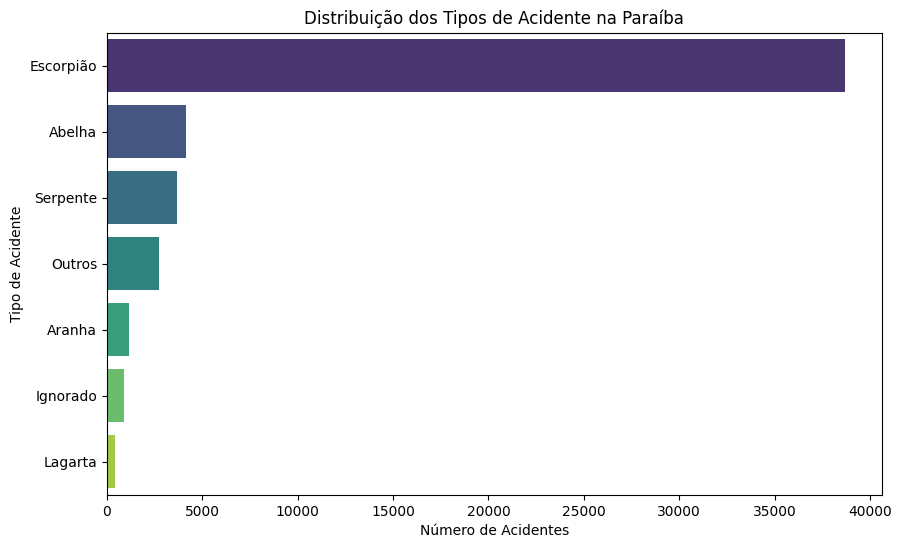

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.countplot(data=dados_pb, y='Tipo de acidente', order=dados_pb['Tipo de acidente'].value_counts().index, palette='viridis')
plt.title('Distribuição dos Tipos de Acidente na Paraíba')
plt.xlabel('Número de Acidentes')
plt.ylabel('Tipo de Acidente')
plt.show()

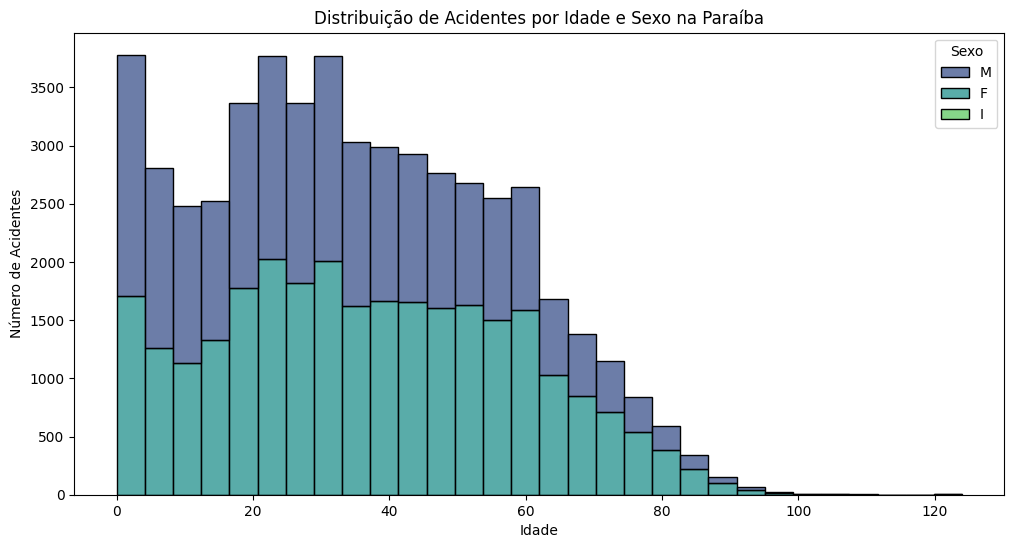

/tmp/ipython-input-53-3716683705.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=dados_pb, x='Sexo', palette='viridis')


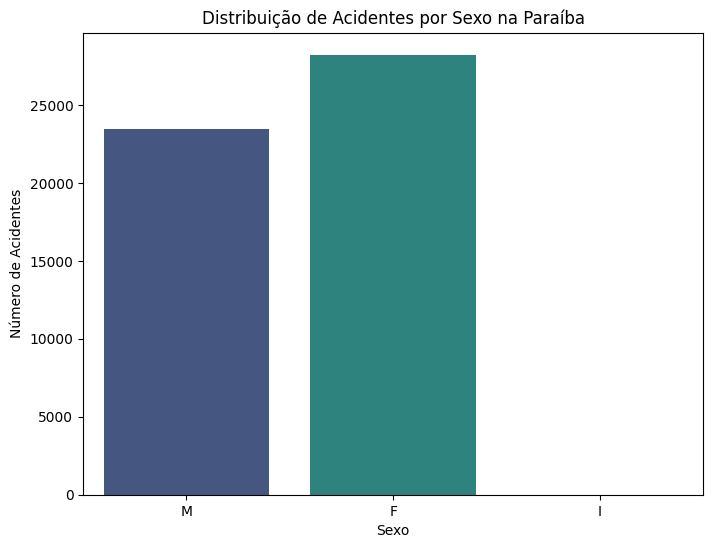

In [ ]:
plt.figure(figsize=(12, 6))
sns.histplot(data=dados_pb, x='Idade', hue='Sexo', multiple='stack', bins=30, palette='viridis')
plt.title('Distribuição de Acidentes por Idade e Sexo na Paraíba')
plt.xlabel('Idade')
plt.ylabel('Número de Acidentes')
plt.show()

plt.figure(figsize=(8, 6))
sns.countplot(data=dados_pb, x='Sexo', palette='viridis')
plt.title('Distribuição de Acidentes por Sexo na Paraíba')
plt.xlabel('Sexo')
plt.ylabel('Número de Acidentes')
plt.show()

**Reasoning**:
Analyze the relationship between the type of accident and the time of day or location of the accident.



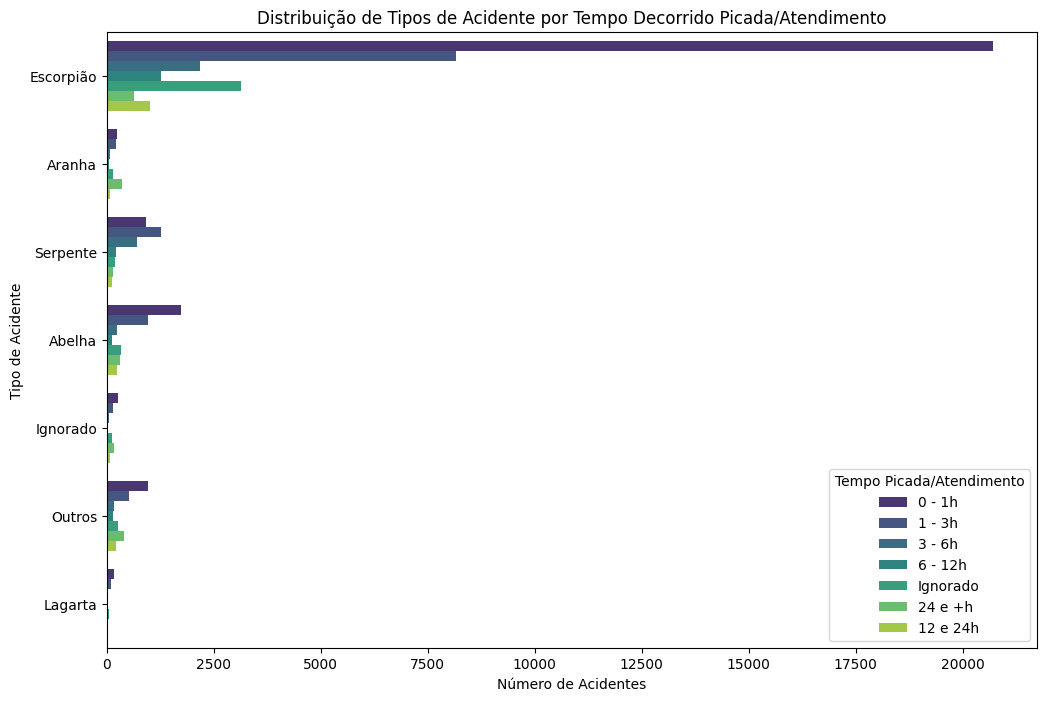

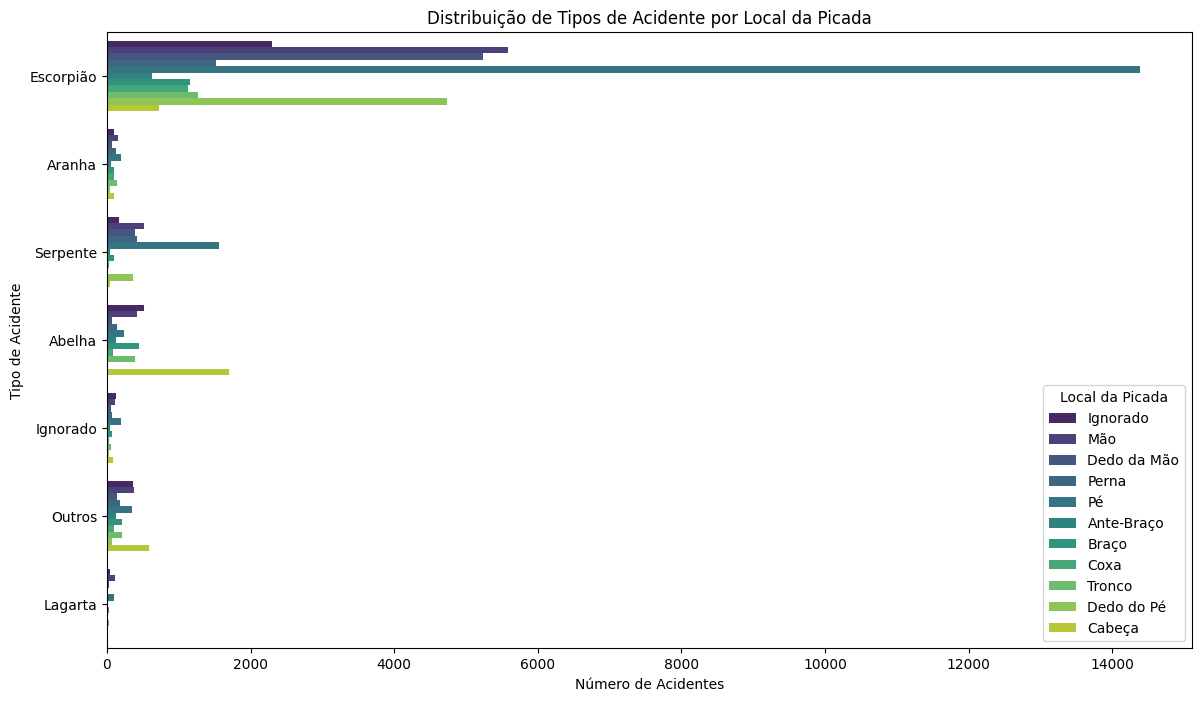

In [ ]:
plt.figure(figsize=(12, 8))
sns.countplot(data=dados_pb, y='Tipo de acidente', hue='Tempo decorrido picada/atendimento', palette='viridis')
plt.title('Distribuição de Tipos de Acidente por Tempo Decorrido Picada/Atendimento')
plt.xlabel('Número de Acidentes')
plt.ylabel('Tipo de Acidente')
plt.legend(title='Tempo Picada/Atendimento')
plt.show()

plt.figure(figsize=(14, 8))
sns.countplot(data=dados_pb, y='Tipo de acidente', hue='Local da picada', palette='viridis')
plt.title('Distribuição de Tipos de Acidente por Local da Picada')
plt.xlabel('Número de Acidentes')
plt.ylabel('Tipo de Acidente')
plt.legend(title='Local da Picada')
plt.show()

**Reasoning**:
Analyze the distribution of accident outcomes based on the type of accident and sorotherapy administration.



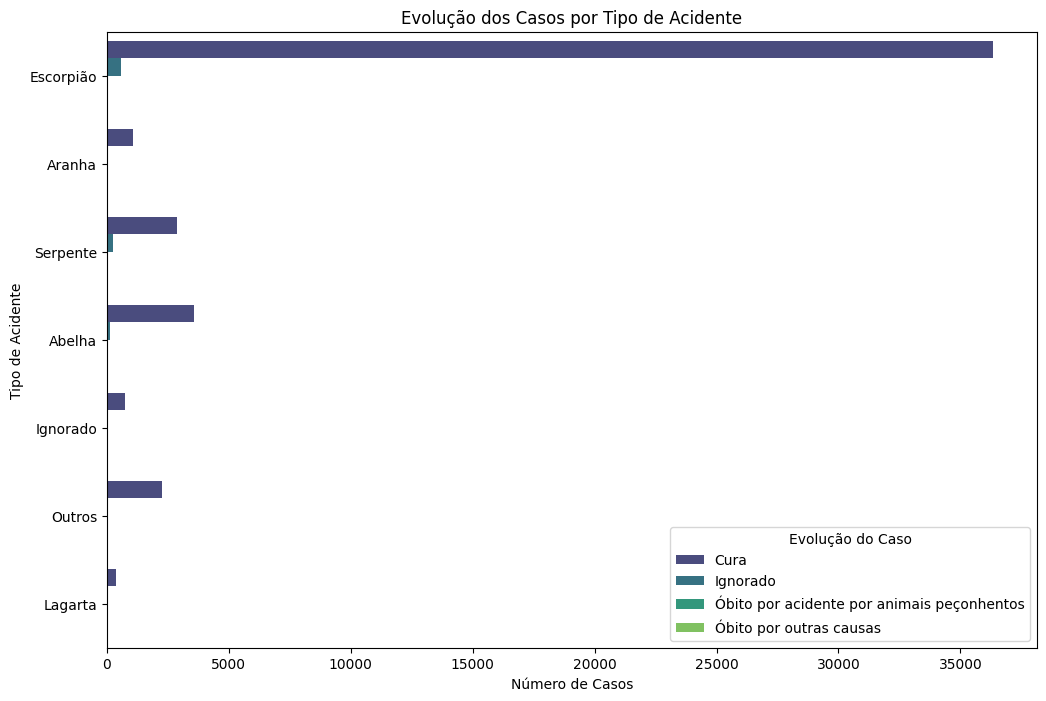

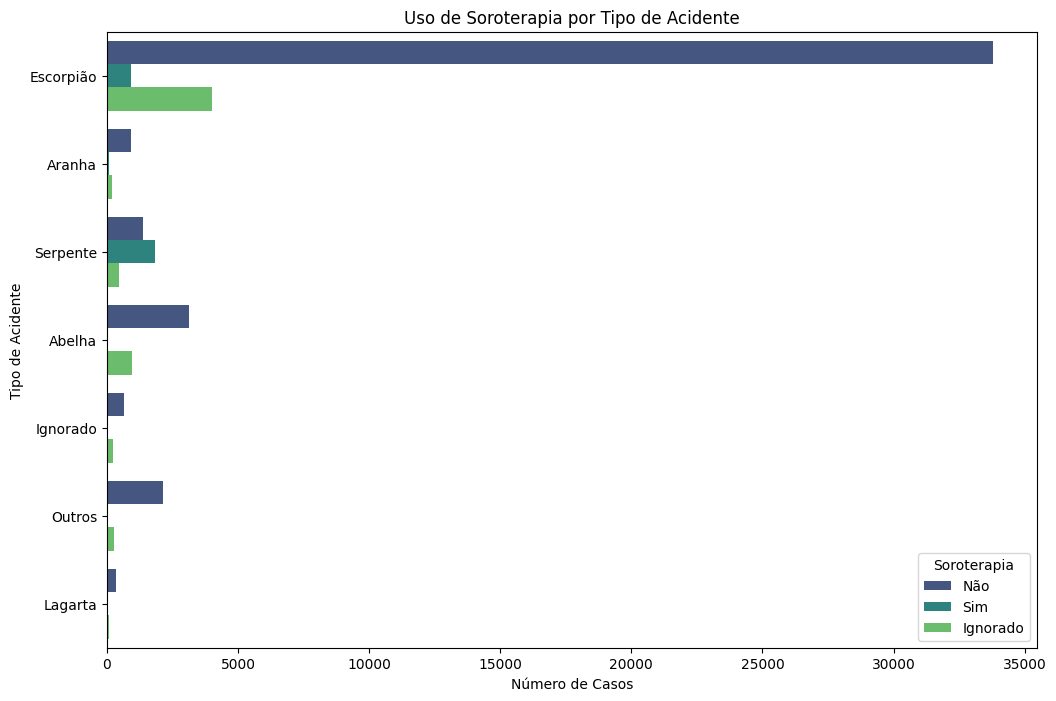

In [ ]:
plt.figure(figsize=(12, 8))
sns.countplot(data=dados_pb, y='Tipo de acidente', hue='Evolução do caso', palette='viridis')
plt.title('Evolução dos Casos por Tipo de Acidente')
plt.xlabel('Número de Casos')
plt.ylabel('Tipo de Acidente')
plt.legend(title='Evolução do Caso')
plt.show()

plt.figure(figsize=(12, 8))
sns.countplot(data=dados_pb, y='Tipo de acidente', hue='Soroterapia', palette='viridis')
plt.title('Uso de Soroterapia por Tipo de Acidente')
plt.xlabel('Número de Casos')
plt.ylabel('Tipo de Acidente')
plt.legend(title='Soroterapia')
plt.show()

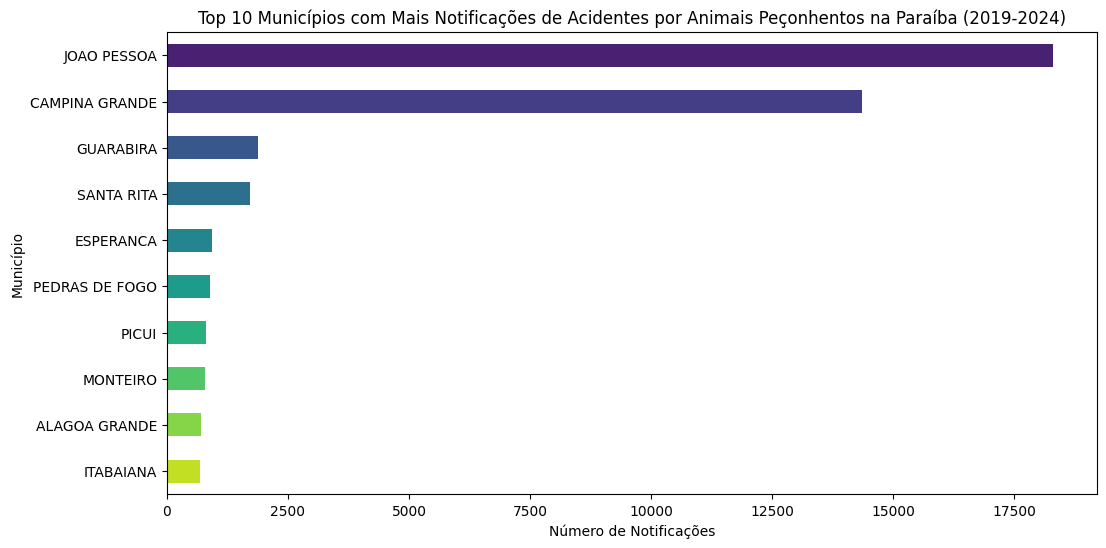

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))
notificacoes_por_municipio.head(10).plot(kind='barh', color=sns.color_palette('viridis', 10))
plt.title('Top 10 Municípios com Mais Notificações de Acidentes por Animais Peçonhentos na Paraíba (2019-2024)')
plt.xlabel('Número de Notificações')
plt.ylabel('Município')
plt.gca().invert_yaxis() # Inverter o eixo Y para exibir o município com mais notificações no topo
plt.show()

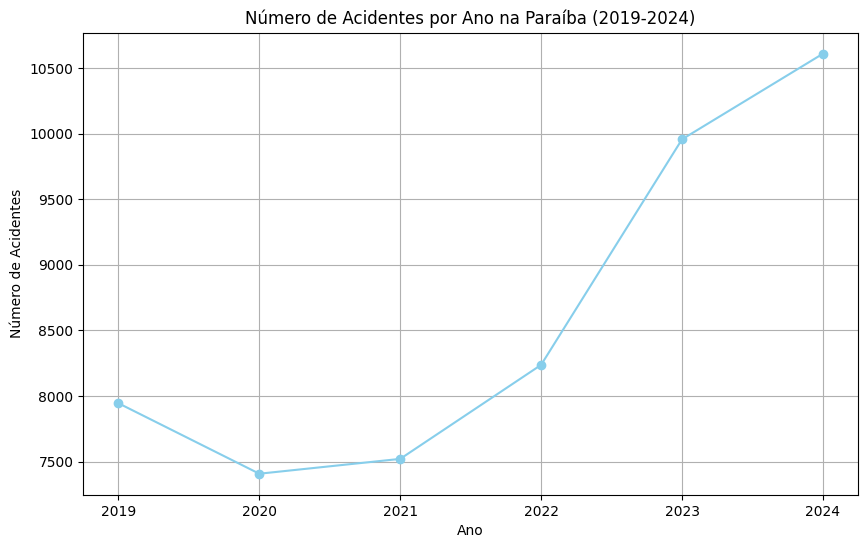

In [ ]:
plt.figure(figsize=(10, 6))
acidentes_por_ano.plot(kind='line', marker='o', color='skyblue')
plt.title('Número de Acidentes por Ano na Paraíba (2019-2024)')
plt.xlabel('Ano')
plt.ylabel('Número de Acidentes')
plt.grid(True)
plt.show()